In [2]:
import sqlite3
import pandas as pd

In [3]:
# accès à la table departement pour afficher son contenu
connexion = sqlite3.connect('Database.db')
cursor = connexion.cursor()

query = '''SELECT 
    offres.intitule,
    offres.description_offre,
    offres.date_creation,
    offres.salaire_min_annuel,
    offres.salaire_max_annuel,
    offres.salaire_annuel_mean,
    offres.qualification_libelle,
    offres.experience,
    offres.type_contrat,
    offres.secteur_activite,
    d_ville.ville,
    d_ville.latitude,
    d_ville.longitude,
    d_ville.code_postal,
    d_ville.departement AS ville_departement,
    d_entreprise.entreprise_nom,
    d_entreprise.entreprise_description,
    h_departement.departement,
    h_departement.departement_nom,
    h_departement.region
        
    FROM offres
    JOIN d_ville ON offres.id_ville = d_ville.id
    JOIN d_entreprise ON offres.id_entreprise = d_entreprise.id
    JOIN h_departement ON d_ville.departement = h_departement.departement;
'''
df = pd.read_sql_query(query, connexion)

connexion.close()

In [4]:
df

,intitule,description_offre,date_creation,salaire_min_annuel,salaire_max_annuel,salaire_annuel_mean,qualification_libelle,experience,type_contrat,secteur_activite,ville,latitude,longitude,code_postal,ville_departement,entreprise_nom,entreprise_description,departement,departement_nom,region
0,Senior Data Engineer F/H (H/F),"Le saviez-vous ?\n\nNous rejoindre, c'est rejo...",29/12/2023,None,None,None,None,oui,CDI,Autres activités informatiques,MASSY,49.687882,1.395968,76270.0,seine-maritime,None,"Nous rejoindre, c'est rejoindre l'un des leade...",seine-maritime,None,normandie
1,Data Engineer H/F,"Rejoindre le Groupe IRCEM, c'est participer à ...",29/12/2023,None,None,None,None,oui,CDI,None,ROUBAIX,50.688369,3.181903,59100.0,nord,IRCEM,None,nord,None,hauts-de-france
2,Analytics Engineer F/H - Marketing (H/F),Descriptif du poste:\n\nRôle : L Analytics Eng...,29/12/2023,None,None,None,Cadre,oui,CDI,Restauration de type rapide,ORLY,48.742795,2.394977,94310.0,val-de-marne,CPF,"Depuis 2002, Amorino émerveille les gourmands ...",val-de-marne,None,île-de-france
3,DATA ENGINEER - H/F,Description :\n\n\nvous rejoindrez une équipe ...,28/12/2023,45000.0,55000.0,50000.0,None,oui,CDI,Administration publique (tutelle) des activité...,ORLEANS,47.873504,1.917316,45100.0,loiret,DSI Pôle Emploi,None,loiret,None,centre-val de loire
4,DATA ENGINEER - H/F,Description :\n\n\nvous rejoindrez une équipe ...,28/12/2023,45000.0,55000.0,50000.0,None,oui,CDI,Administration publique (tutelle) des activité...,AIX EN PROVENCE,43.536112,5.398630,13080.0,bouches-du-rhône,DSI Pôle Emploi,None,bouches-du-rhône,None,provence-alpes-côte d'azur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,Analyste développeur - data scientist F/H,L’arrivée à maturité de solutions informatique...,06/12/2023,None,None,None,Cadre du secteur privé,non,CDI,TIERCE MAINTENANCE DE SYSTÈMES ET D'APPLICATIO...,STRASBOURG,48.571265,7.767760,67000.0,bas-rhin,EURO-INFORMATION DEVELOPPEMENTS,"Euro-Information, filiale technologique de Cré...",bas-rhin,None,grand est
290,Data scientist / Chargé(e) d'études sur la pet...,Concrètement votre futur quotidien ?\nVous pre...,28/12/2023,None,None,None,Cadre du secteur privé,oui,CDI,ACTIVITÉS GÉNÉRALES DE SÉCURITÉ SOCIALE,PARIS 14,48.829262,2.326537,75014.0,paris,CNAF,Vous souhaitez rejoindre une équipe expériment...,paris,None,île-de-france
291,Expert en sciences des données spécialisé en I...,Mission :\nEn tant que Data scientist spéciali...,18/12/2023,None,None,None,Cadre du secteur public / Armées,oui,CDD,ADMINISTRATION PUBLIQUE GÉNÉRALE,PARIS 15,48.840072,2.292837,75015.0,paris,DIRECTION DU NUMÉRIQUE DES MINISTÈRES SOCIAUX,Vous souhaitez intégrer une Direction numériqu...,paris,None,île-de-france
292,Data scientist / Chargé(e) d'études sur la pet...,\nConcrètement votre futur quotidien ?\nVous ...,19/12/2023,None,None,None,Cadre du secteur privé,non,CDI,ACTIVITÉS GÉNÉRALES DE SÉCURITÉ SOCIALE,PARIS 14,48.829262,2.326537,75014.0,paris,CNAF,Vous souhaitez rejoindre une équipe expériment...,paris,None,île-de-france


In [5]:
# Filtrer les lignes contenant les mots clés dans la colonne "Titres" (environ 150 restants)
data_engineer_df = df[df['intitule'].str.contains(r'\b(data ingénieur|data ingenieur|data engineer)\b', case=False, na=False)]

data_engineer_df.shape

/var/folders/0b/1f6rtdh943b_w3yh5c9675cw0000gn/T/ipykernel_92215/814614228.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_engineer_df = df[df['intitule'].str.contains(r'\b(data ingénieur|data ingenieur|data engineer)\b', case=False, na=False)]


(164, 20)

In [6]:
# Filtrer les lignes contenant les mots clés dans la colonne "Titres" (environ 68 lignes)
data_scientist_df = df[df['intitule'].str.contains(r'\b(data scientist|data science|datascience|datascientist)\b', case=False, na=False)]

data_scientist_df.shape

/var/folders/0b/1f6rtdh943b_w3yh5c9675cw0000gn/T/ipykernel_92215/3863151059.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_scientist_df = df[df['intitule'].str.contains(r'\b(data scientist|data science|datascience|datascientist)\b', case=False, na=False)]


(105, 20)

# Wordcloud pour data ingé

In [7]:
!pip install wordcloud==1.8.0

  Using cached wordcloud-1.8.0.tar.gz (217 kB)
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/0b/1f6rtdh943b_w3yh5c9675cw0000gn/T/pip-install-121j9a8v/wordcloud_8aa59595bde942409a7a84d731e122b8/setup.py'"'"'; __file__='"'"'/private/var/folders/0b/1f6rtdh943b_w3yh5c9675cw0000gn/T/pip-install-121j9a8v/wordcloud_8aa59595bde942409a7a84d731e122b8/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/0b/1f6rtdh943b_w3yh5c9675cw0000gn/T/pip-wheel-jk240nvq
       cwd: /private/var/folders/0b/1f6rtdh943b_w3yh5c9675cw0000gn/T/pip-install-121j9a8v/wordcloud_8aa59595bde942409a7a84d731e122b8/
  Complete output (24 lines):

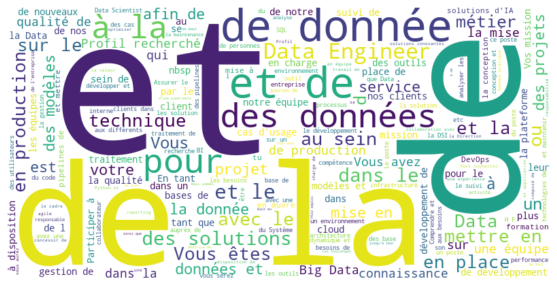

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer tous les textes de la colonne 'texte' en une seule chaîne
texte_concatene = ' '.join(data_engineer_df['description_offre'].astype(str))

# Créer l'objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_concatene)

# Afficher le nuage de mots à l'aide de Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Masquer les axes
plt.show()


# Wordcloud pour data scientist

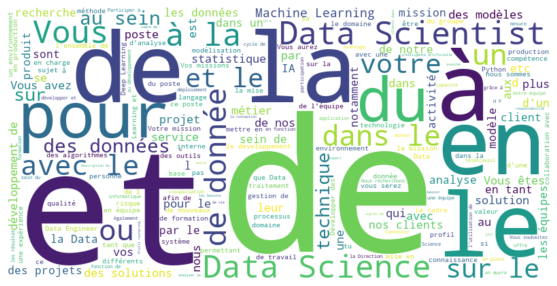

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer tous les textes de la colonne 'texte' en une seule chaîne
texte_concatene = ' '.join(data_scientist_df['description_offre'].astype(str))

# Créer l'objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_concatene)

# Afficher le nuage de mots à l'aide de Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Masquer les axes
plt.show()


In [15]:
#liste des ponctuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [18]:
#nécessité de punkt - modèle de tokénisation
#à charger en ligne si ce n'est pas déjà fait
import nltk
#nltk.download()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martinrevel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#liste des ponctuations
import string
ponctuations = list(string.punctuation)
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martinrevel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/martinrevel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinrevel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/martinrevel/nltk_data...


True

In [26]:
#récupérer sous forme de liste
corpus = df['description_offre'].tolist()

#passer en minuscule
corpus = [doc.lower() for doc in corpus]

# Retirer les chiffres dans l'ensemble du corpus
chiffres = list("0123456789")
corpus= ["".join([mot for mot in list(doc) if not mot in chiffres]) for doc in corpus]

#retrait des ponctuations
corpus = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpus]

#enlever les "\n":
corpus = [s.replace("\n","") for s in corpus]

#transformer le corpus en liste de listes (les documents)
#par tokénisation
corpus_tk = [word_tokenize(doc) for doc in corpus]

#Lemmatisation
lem = WordNetLemmatizer()
corpus_lm = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]

#charger les stopwords
mots_vides = stopwords.words('french')

#suppression des stopwords
corpus_sw = [[mot for mot in doc if not (mot in mots_vides)] for doc in corpus_lm]

#retirer les token de moins de 3 lettres
corpus_sw = [[mot for mot in doc if len(mot) >= 3] for doc in corpus_sw]
print(corpus_sw[0])

['saviezvous', 'rejoindre', 'cest', 'rejoindre', 'lun', 'leader', 'mondiaux', 'distribution', 'met', 'laccent', 'quotidien', 'diversité', 'rse', 'digital', 'satisfaire', 'client', 'collaborateurs', 'tant', 'partenaire', 'premium', 'jeux', 'olympiques', 'paralympiques', 'paris', 'partageons', 'valeurs', 'sport', 'permettant', 'équipes', 'dépasser', 'encourageons', 'alimentation', 'saine', 'juste', 'prix', 'tousvous', 'cherchez', 'travailler', 'entreprise', 'dynamique', 'travail', 'rime', 'impact', 'social', 'environnemental', 'bienvenue', 'chez', 'direction', 'data', 'france', 'recrute', 'senior', 'data', 'engineer', 'fhnous', 'utilisons', 'approches', 'machine', 'learning', 'résoudre', 'défis', 'commerciaux', 'opérationnels', 'comme', 'rupture', 'magasin', 'prévision', 'ventes', 'loptimisation', 'lassortiment', 'produits', 'personnalisation', 'lexpérience', 'plateformes', 'eecommerce', 'missionsen', 'tant', 'data', 'engineer', 'construirez', 'systèmes', 'traitement', 'données', 'robust